# Exploratory Data Analysis with IA assistants (Gemini example)

## Dataset

The dataset we will use is the publicly available Kaggle dataset

[**Brazilian E-Commerce Public Dataset by Olist**](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

+ [olist_sellers_dataset.csv](https://www.dropbox.com/scl/fi/jwabh3t47inuaajgt2dys/olist_sellers_dataset.csv?rlkey=zrz6k0zd8maqviegybyaxnm08&st=o9iaxjxg&dl=0)
+ [olist_customers_dataset.csv](https://www.dropbox.com/scl/fi/bd5aainkdjggen5wxndmo/olist_customers_dataset.csv?rlkey=ex62zfeq1le8j1prw5qh0fg25&st=6wwsoodh&dl=0)

## prompt:
I have a zip file at
https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=0
that contains several csv files. I want to download it and decompress it to a subfolder called data. I am running this code in MacOS.


In [5]:
import os
import requests
import zipfile

# Define the URL and local path for the zip file
zip_url = 'https://www.dropbox.com/scl/fi/4zxiotlnzt8a6ap2hu0je/brazilian_e_commerce.zip?rlkey=h2e1u2770aq0ywltlpaapd10a&st=mtznoubo&dl=1'
zip_path = 'brazilian_e_commerce.zip'

# Download the zip file if it doesn't exist
if not os.path.exists(zip_path):
    response = requests.get(zip_url)
    with open(zip_path, 'wb') as f:
        f.write(response.content)

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Extract the zip file into the 'data' directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

## prompt:

I want to load all these files into python, so that e.g. olist_customers_dataset is stored as customers, and similarly for all data files whose names begin by olist_


In [6]:
import pandas as pd
import os

# Get the list of files in the data directory
data_files = os.listdir('data/')

# Iterate through the files and load the ones starting with 'olist_'
for file_name in data_files:
    if file_name.startswith('olist_') and file_name.endswith('.csv'):
        # Create a variable name based on the file name
        # Remove 'olist_' and '_dataset.csv'
        var_name = file_name.replace('olist_', '').replace('_dataset.csv', '')

        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join('data', file_name))

        # Assign the DataFrame to a variable with the generated name
        globals()[var_name] = df

# Now you can access the dataframes using the generated names, e.g., 'customers', 'sellers', etc.

In [ ]:
# prompt: I want to load all these files into python, so that e.g. olist_customers_dataset is stored as customers, and similarly for all data files whose names begin by olist_

import pandas as pd
import os

# Get the list of files in the data directory
data_files = os.listdir('data/')

# Iterate through the files and load the ones starting with 'olist_'
for file_name in data_files:
    if file_name.startswith('olist_') and file_name.endswith('.csv'):
        # Create a variable name based on the file name
        # Remove 'olist_' and '_dataset.csv'
        var_name = file_name.replace('olist_', '').replace('_dataset.csv', '')

        # Load the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join('data', file_name))

        # Assign the DataFrame to a variable with the generated name
        globals()[var_name] = df

# You can now access the dataframes using the generated names, e.g., 'customers', 'sellers', etc.
# For example:

# print(customers.head())
# print(sellers.head())


## prompt:

I want to do basic exploratory analysis on the data in the customers dataframe, what should I do next?


In [40]:
# prompt: I want to do basic exploratory analysis on the data in the customers dataframe, what should I do next?

# Display the first few rows of the dataframe
print(customers.head())

# Display the last few rows of the dataframe
print(customers.tail())

# Get the shape of the dataframe (number of rows and columns)
print(customers.shape)

# Get information about the dataframe, including data types and non-null values
print(customers.info())

# Get descriptive statistics for numerical columns
print(customers.describe())

# Get descriptive statistics for categorical columns
print(customers.describe(include='object'))

# Check for missing values in each column
print(customers.isnull().sum())

# Get the unique values in a specific column (e.g., 'customer_state')
print(customers['customer_state'].unique())

# Get the value counts for a specific categorical column
print(customers['customer_state'].value_counts())

# Get the column names
print(df_customers.columns)


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
                            customer_id                customer_unique_id  \
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   

## prompt::

How many unique values per column are there?

In [41]:
# prompt: How many unique values per column are there?

# Check the number of unique values in each column
for col in customers.columns:
    print(f"{col}: {customers[col].nunique()} unique values")

customer_id: 99441 unique values
customer_unique_id: 96096 unique values
customer_zip_code_prefix: 14994 unique values
customer_city: 4119 unique values
customer_state: 27 unique values


## prompt:

Are there duplicated rows?

In [42]:
# prompt: Are there duplicated rows?

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


## Consider other data sets

## prompt:

How do I check all the other datasets at once for missing data and duplicates?


In [43]:
# prompt: How do I check all the other datasets at once for missing data and duplicates?

import pandas as pd
import sys

# Function to check for missing data and duplicates in a DataFrame
def check_data_quality(df, df_name):
    print(f"--- Checking DataFrame: {df_name} ---")
    print("\nMissing values per column:")
    print(df.isnull().sum())
    print("\nNumber of duplicate rows:")
    print(df.duplicated().sum())
    print("-" * (len(df_name) + 23))

# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and check for pandas DataFrames
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with 'olist_' (after removing 'df_')
    # This assumes the convention of naming dataframes after the original file names without 'olist_' and 'dataset'
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        check_data_quality(var_value, var_name)

--- Checking DataFrame: order_payments ---

Missing values per column:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Number of duplicate rows:
0
-------------------------------------
--- Checking DataFrame: order_reviews ---

Missing values per column:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Number of duplicate rows:
0
------------------------------------
--- Checking DataFrame: customers ---

Missing values per column:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Number of duplicate rows:
0
--------------------------------
--- Checking DataFrame: geolocation ---

Missing

## prompt:

In the products dataframe there are several columns with the same number of missing data. Are these missing data in the same rows of these columns?


In [44]:
# prompt: In the products dataframe there are several columns with the same number of missing data. Are these missing data in the same rows of these columns?

# Find columns in 'products' dataframe with the same number of missing values
missing_counts = products.isnull().sum()
cols_with_same_missing = missing_counts[missing_counts > 0].groupby(missing_counts).groups

# Check if the missing data is in the same rows for columns with the same missing count
for count, cols in cols_with_same_missing.items():
    if len(cols) > 1:
        print(f"\nChecking columns with {count} missing values: {list(cols)}")
        # Create a boolean mask for missing values in each column
        missing_masks = {col: products[col].isnull() for col in cols}

        # Check if the missing masks are identical
        is_same_rows = all(missing_masks[cols[0]].equals(missing_masks[col]) for col in cols[1:])

        if is_same_rows:
            print("  Missing data is in the same rows for these columns.")
        else:
            print("  Missing data is NOT in the same rows for these columns.")
    elif len(cols) == 1 and count > 0:
         print(f"\nColumn '{cols[0]}' has {count} missing values.")


Checking columns with 2 missing values: ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
  Missing data is in the same rows for these columns.

Checking columns with 610 missing values: ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
  Missing data is in the same rows for these columns.


## prompt:

In the orders dataFrame, I have missing values. It looks like the number of missing values in some columns is correlated. How can I check if the missing values form a pattern and visualize it?



Missing value matrix for 'orders' dataframe:


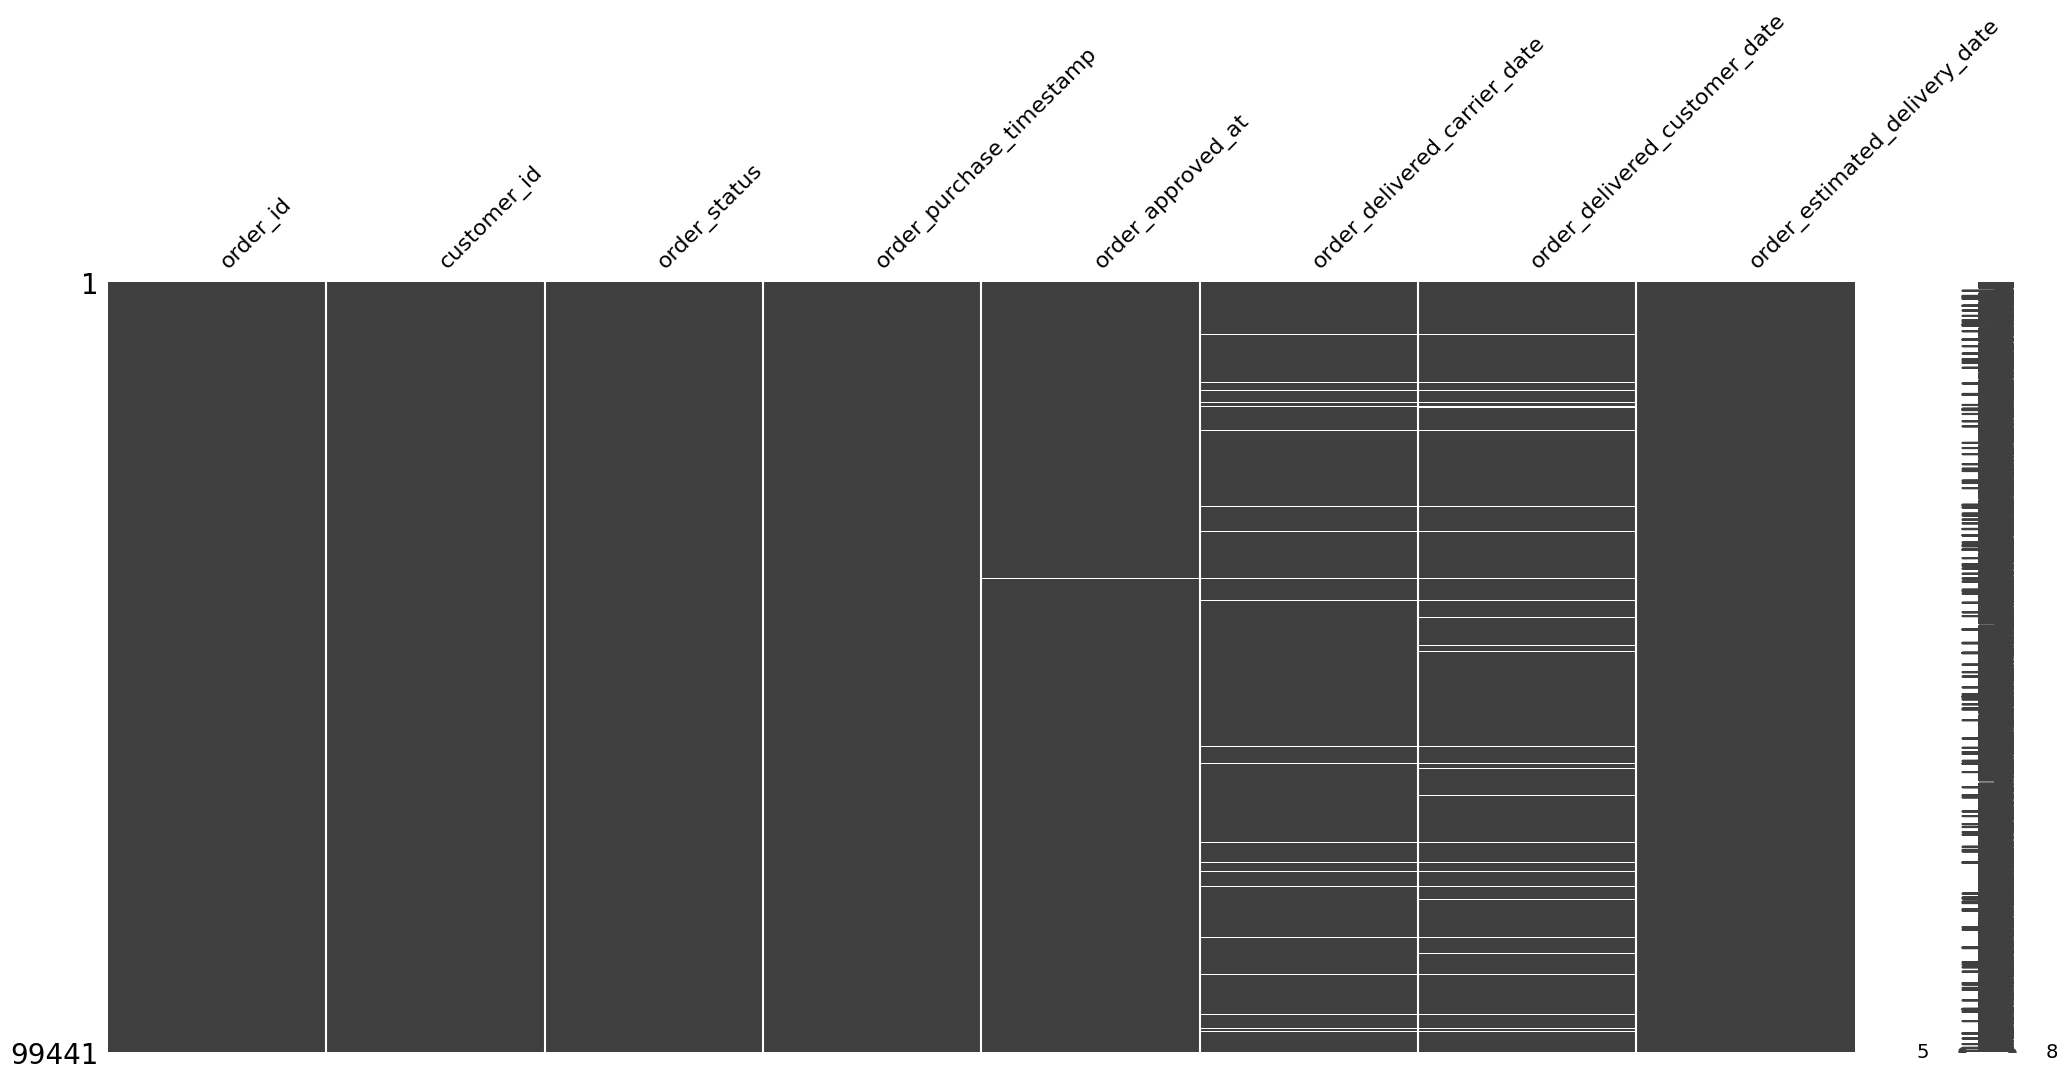


Missing value bar plot for 'orders' dataframe:


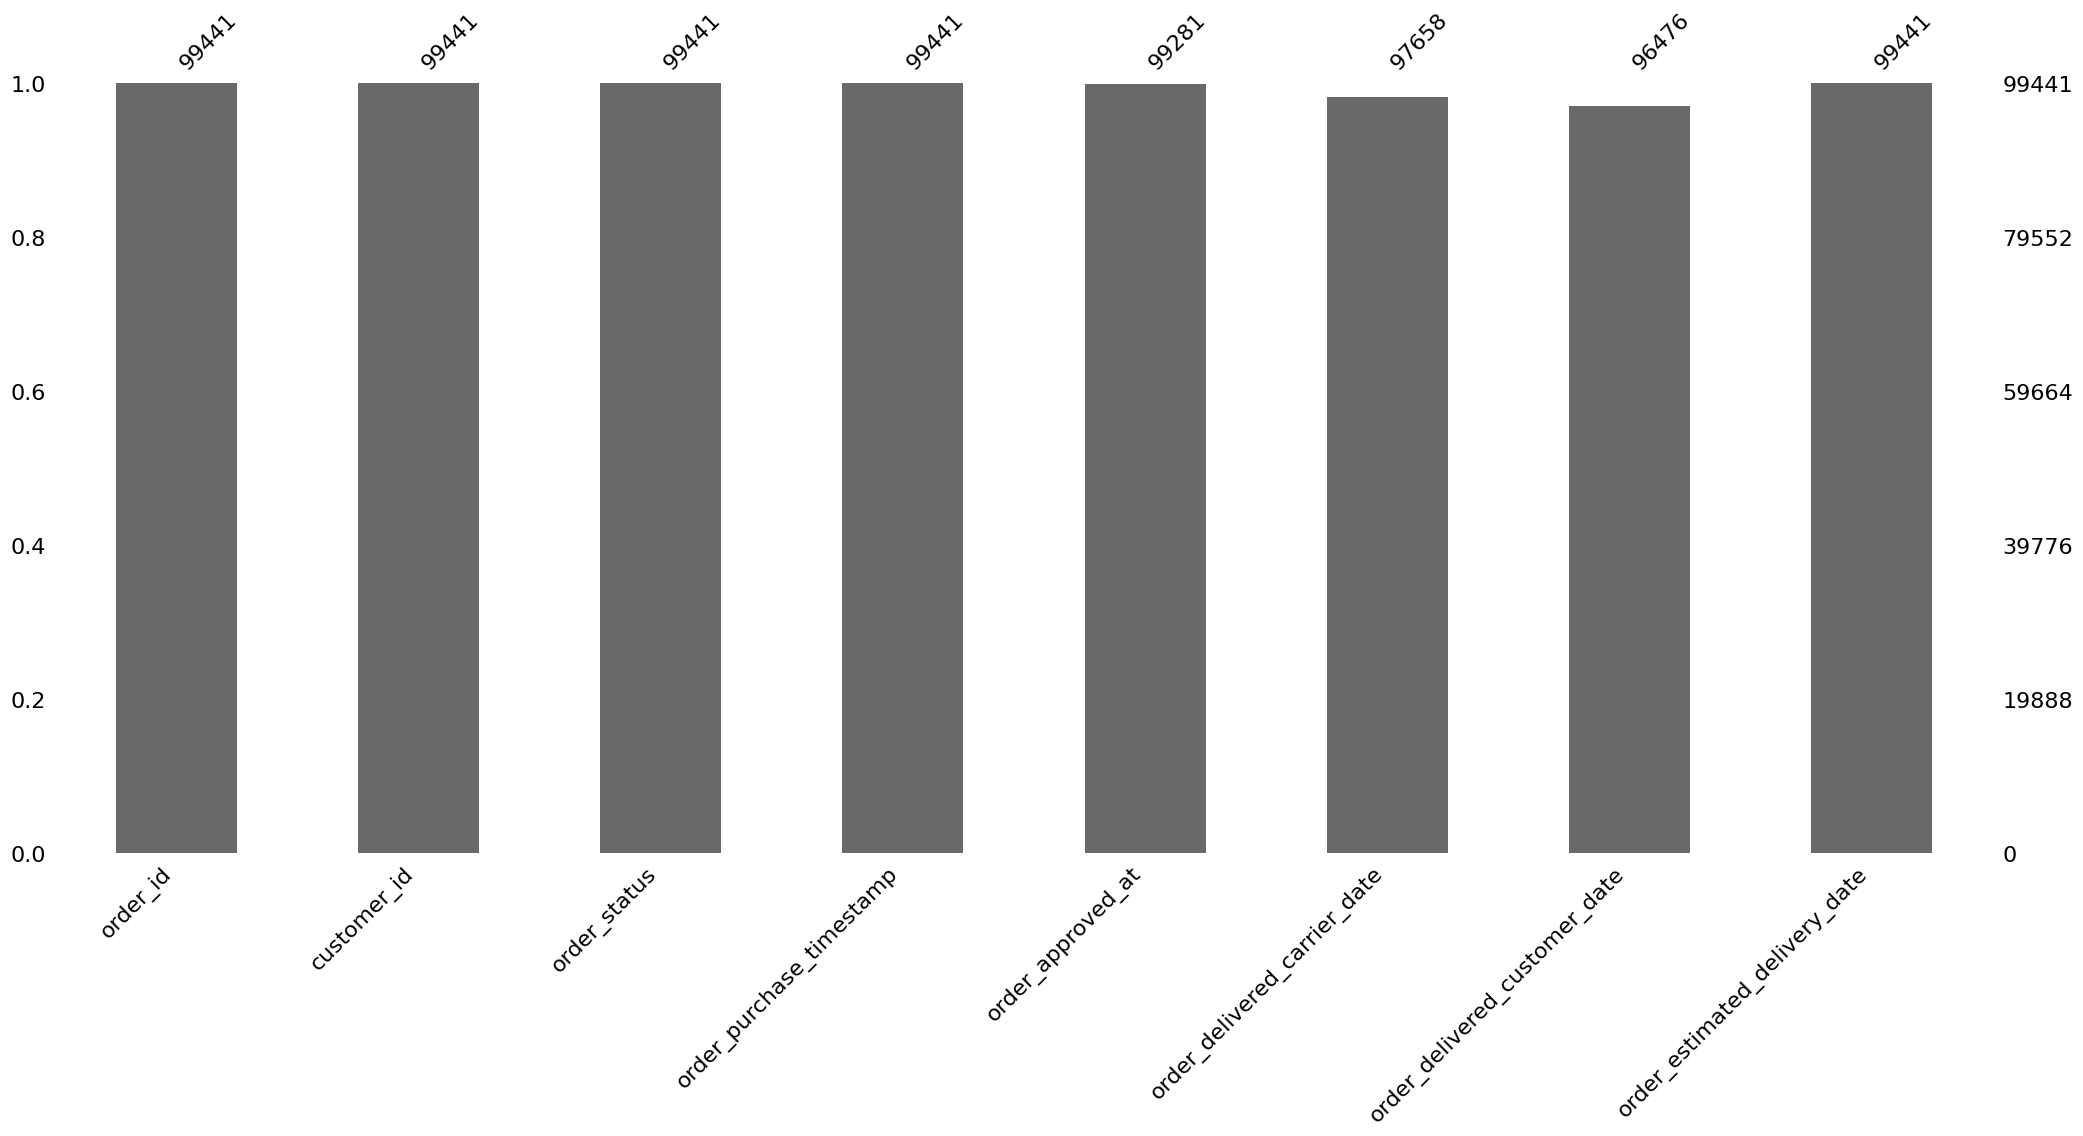


Missing value correlation heatmap for 'orders' dataframe:


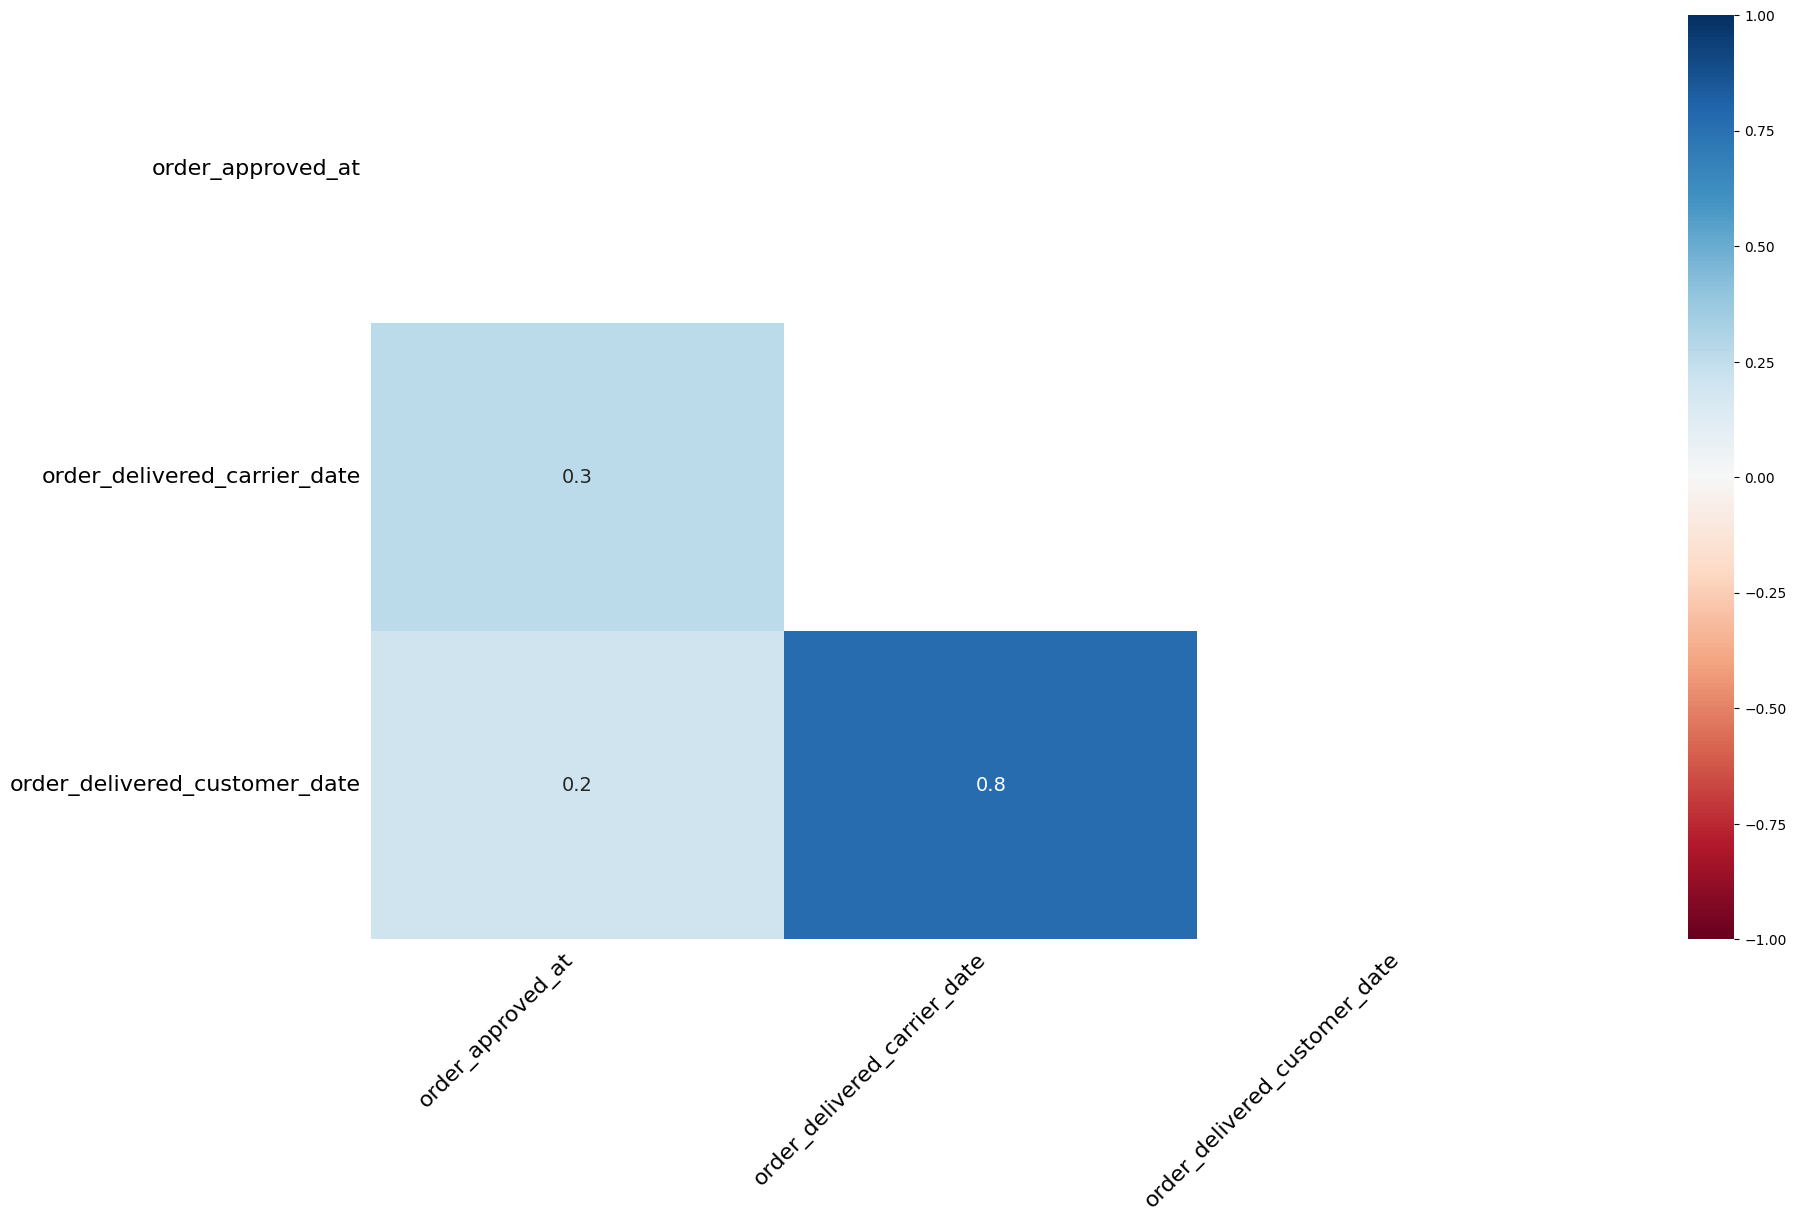


Missing value dendrogram for 'orders' dataframe:


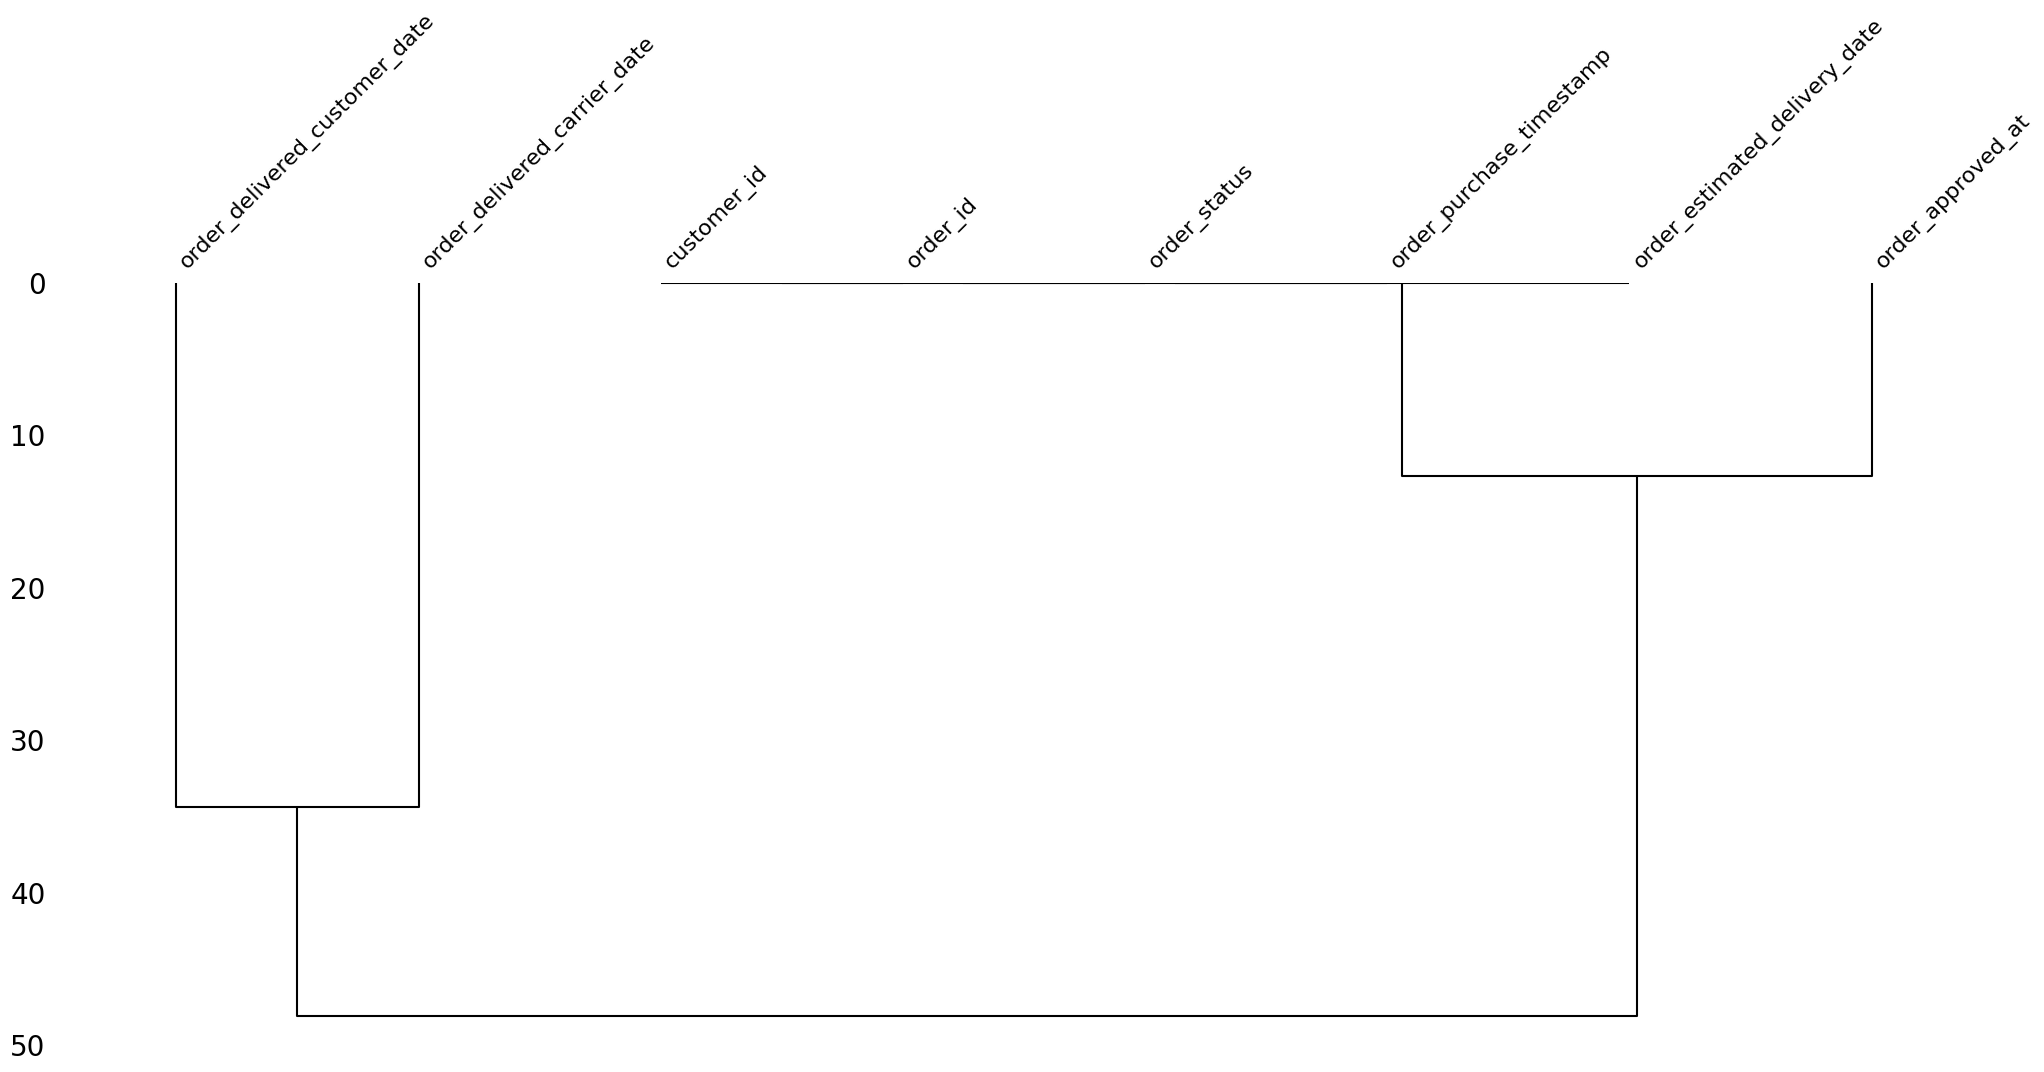

In [45]:
# prompt: In the orders dataFrame, I have missing values. It looks like the number of missing values in some columns is correlated. How can I check if the missing values form a pattern and visualize it?

!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values in the orders dataframe
print("\nMissing value matrix for 'orders' dataframe:")
msno.matrix(orders)
plt.show()

print("\nMissing value bar plot for 'orders' dataframe:")
msno.bar(orders)
plt.show()

# Check the correlation of missing values between columns
print("\nMissing value correlation heatmap for 'orders' dataframe:")
msno.heatmap(orders)
plt.show()

print("\nMissing value dendrogram for 'orders' dataframe:")
msno.dendrogram(orders)
plt.show()

## prompt:

 Can I do the same check for the missing values pattern and visualize it, this time in the products dataset?


Missing value matrix for 'products' dataframe:


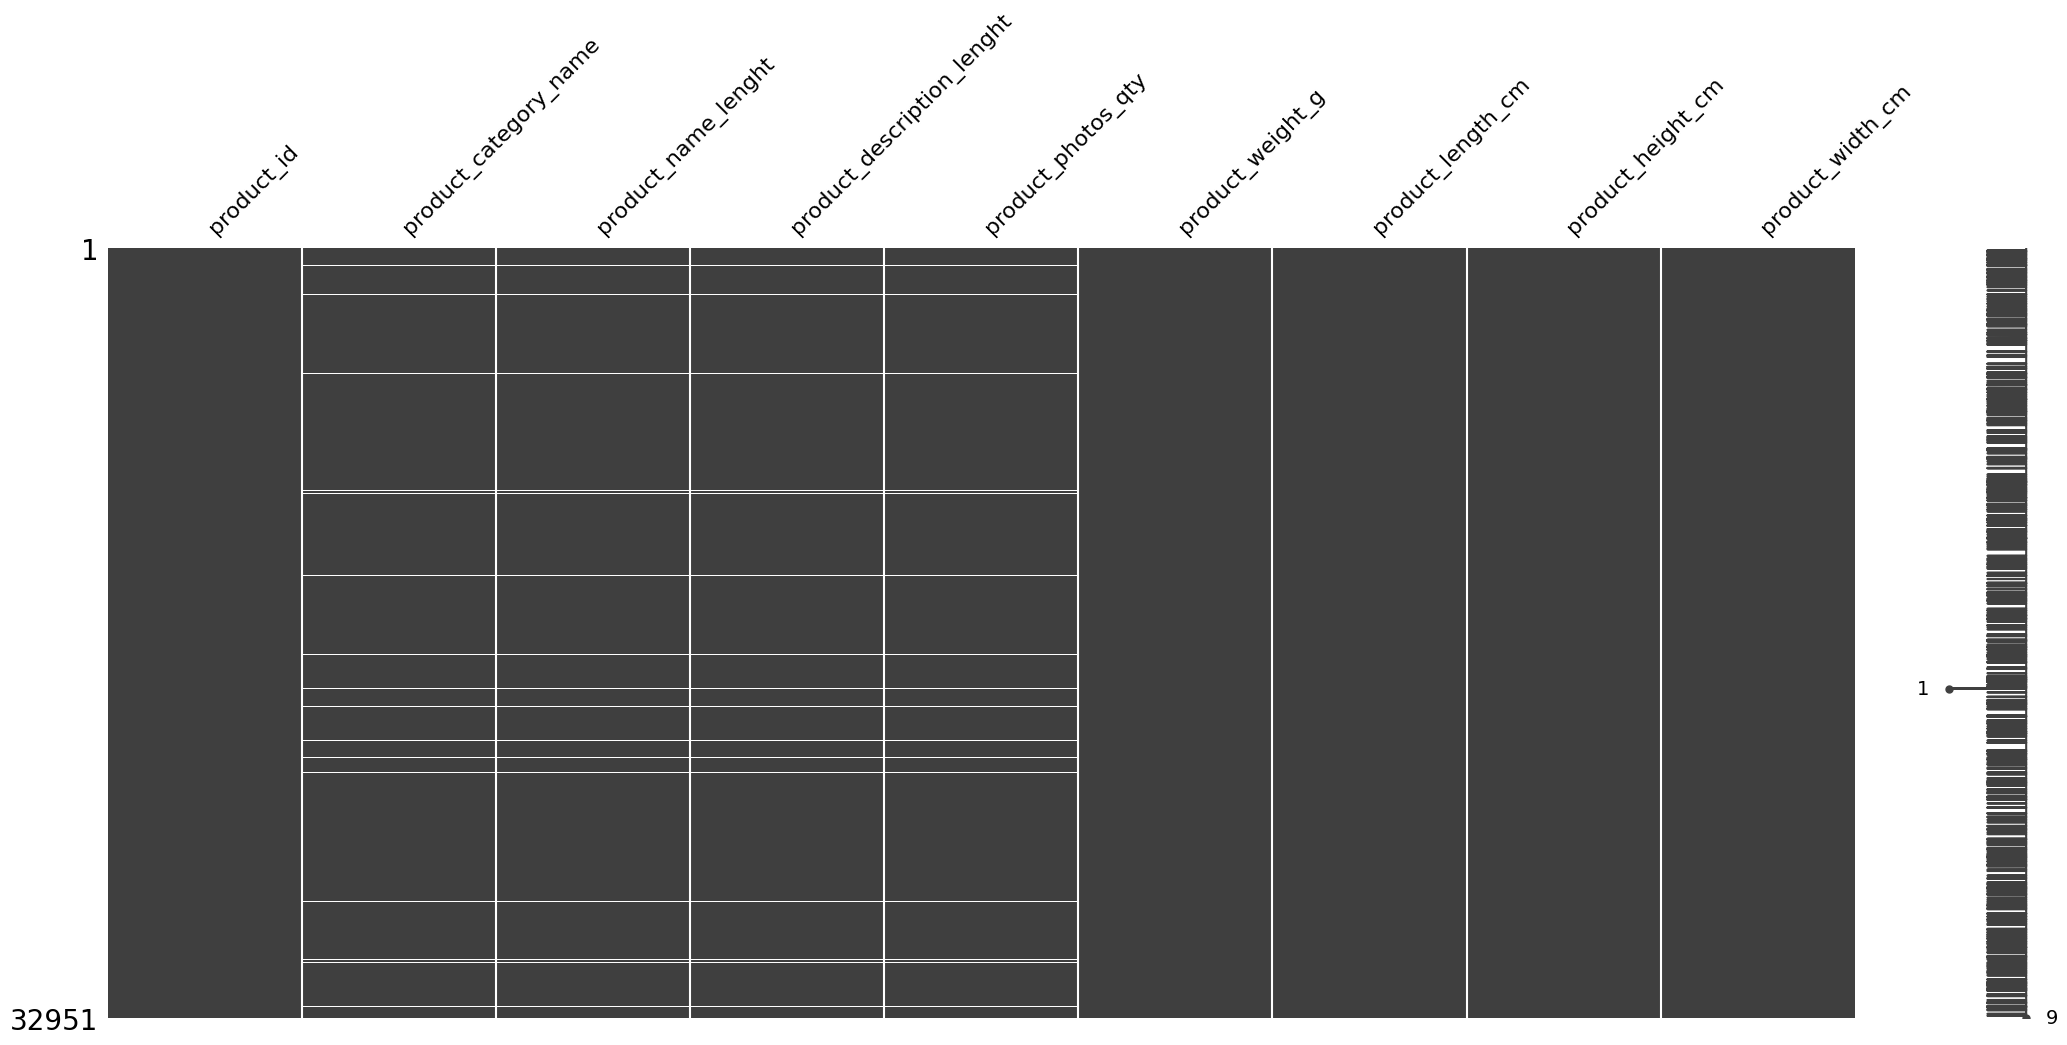


Missing value bar plot for 'products' dataframe:


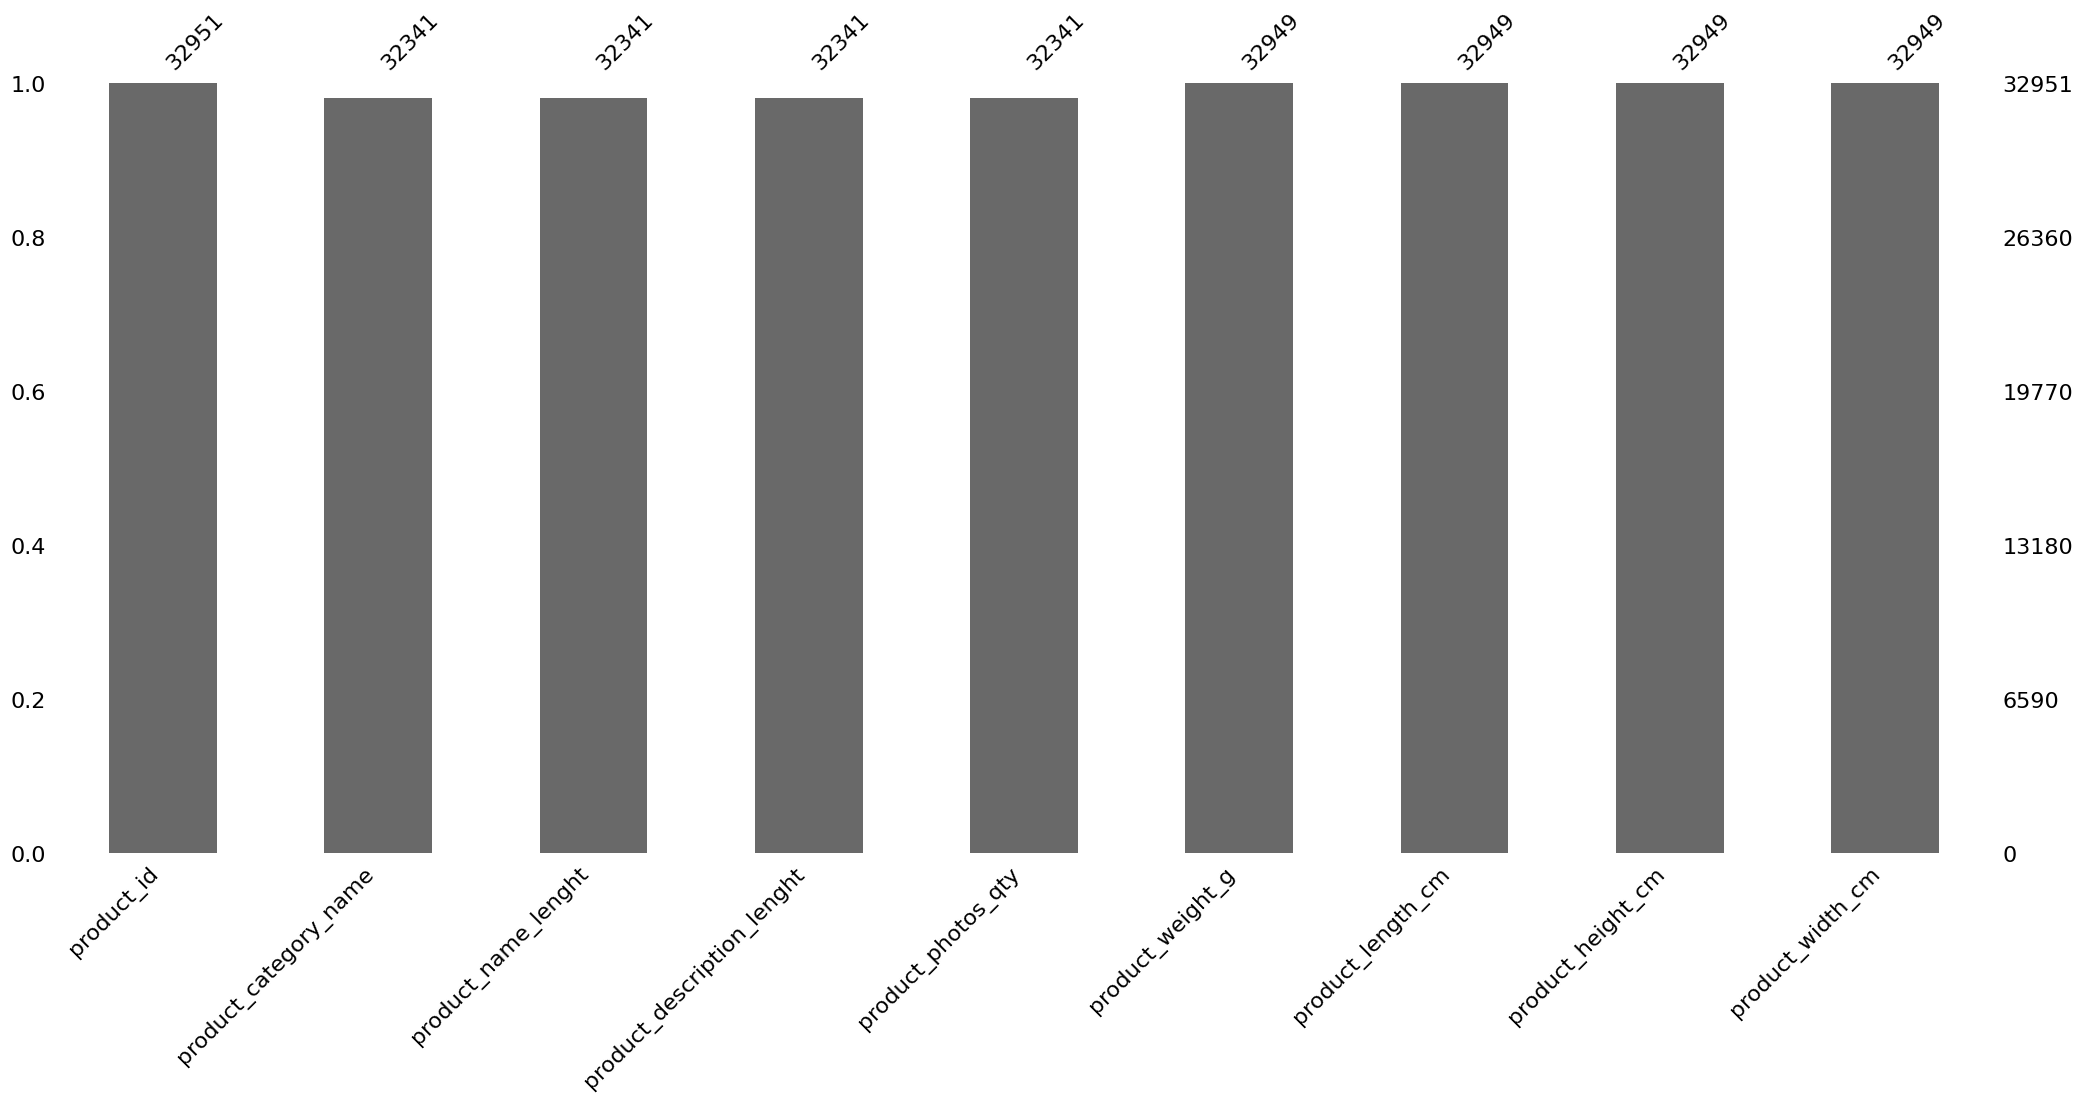


Missing value correlation heatmap for 'products' dataframe:


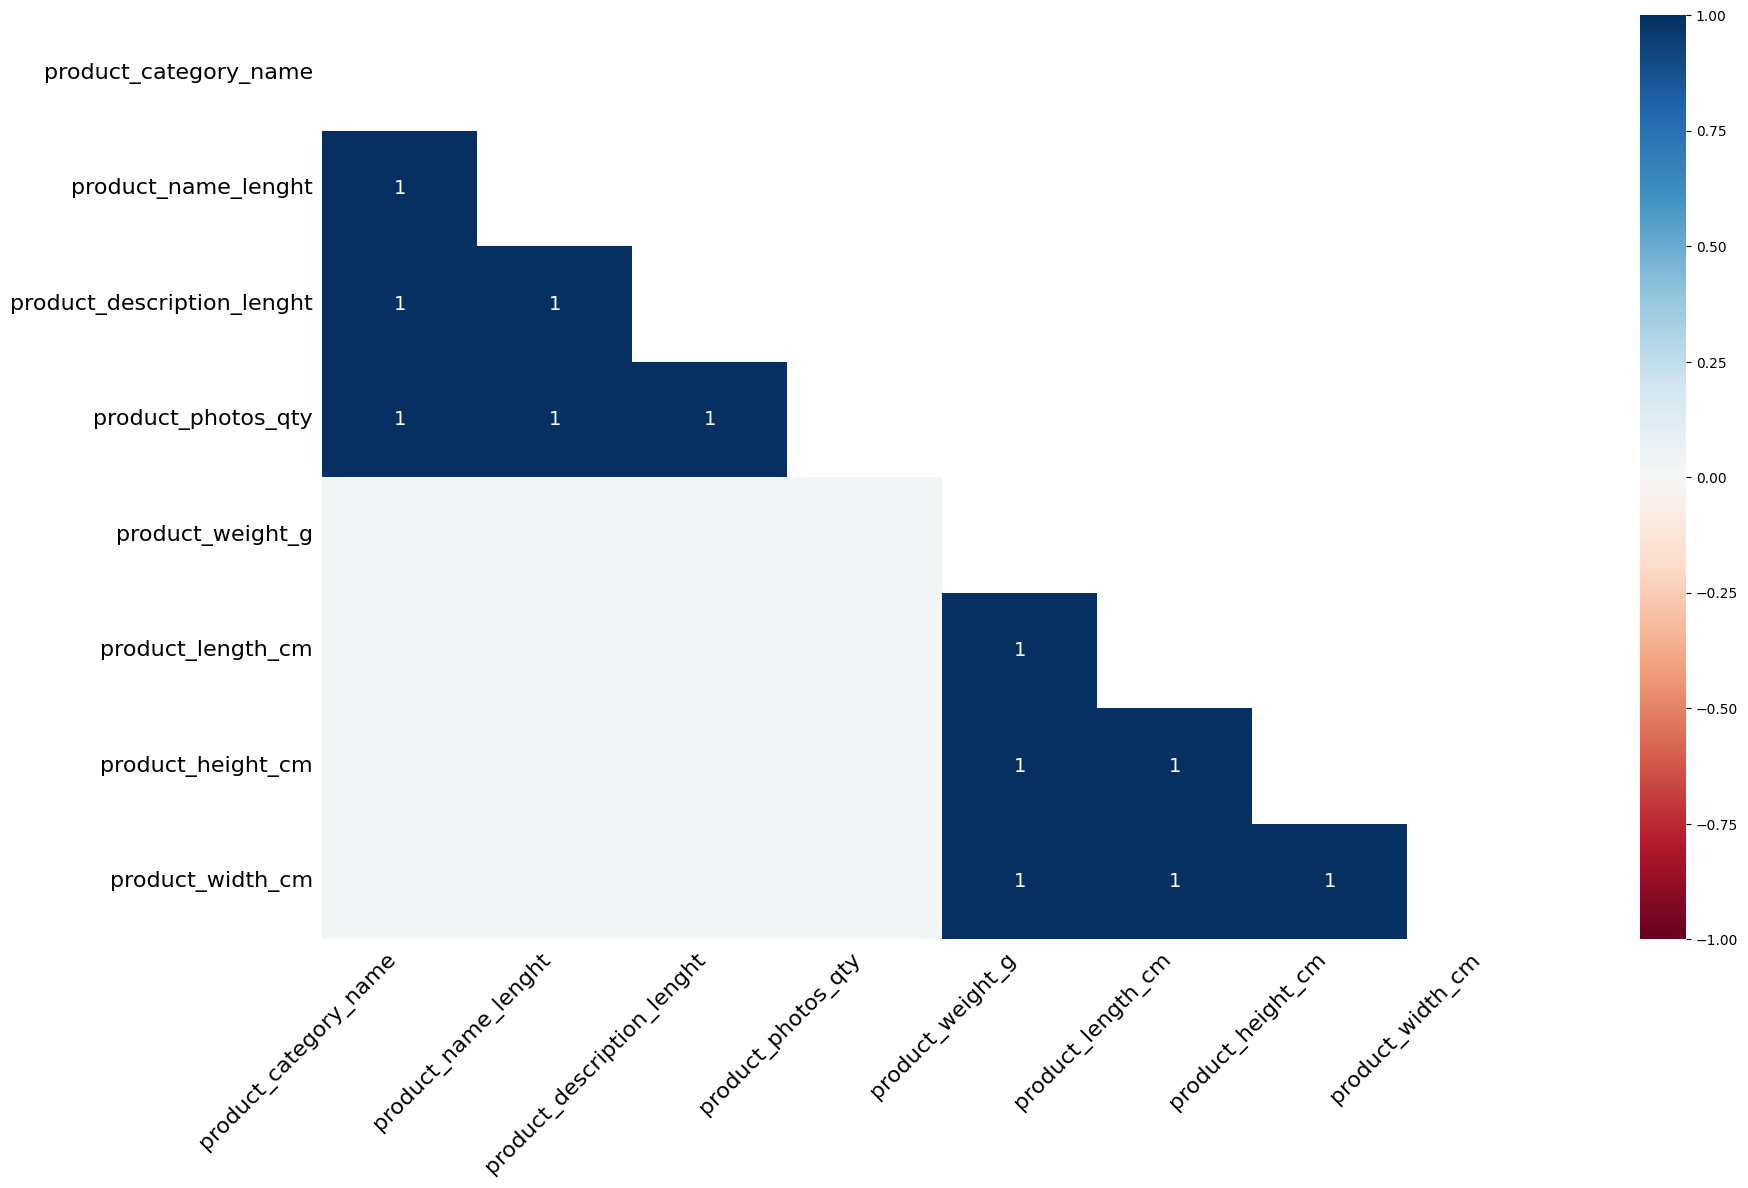


Missing value dendrogram for 'products' dataframe:


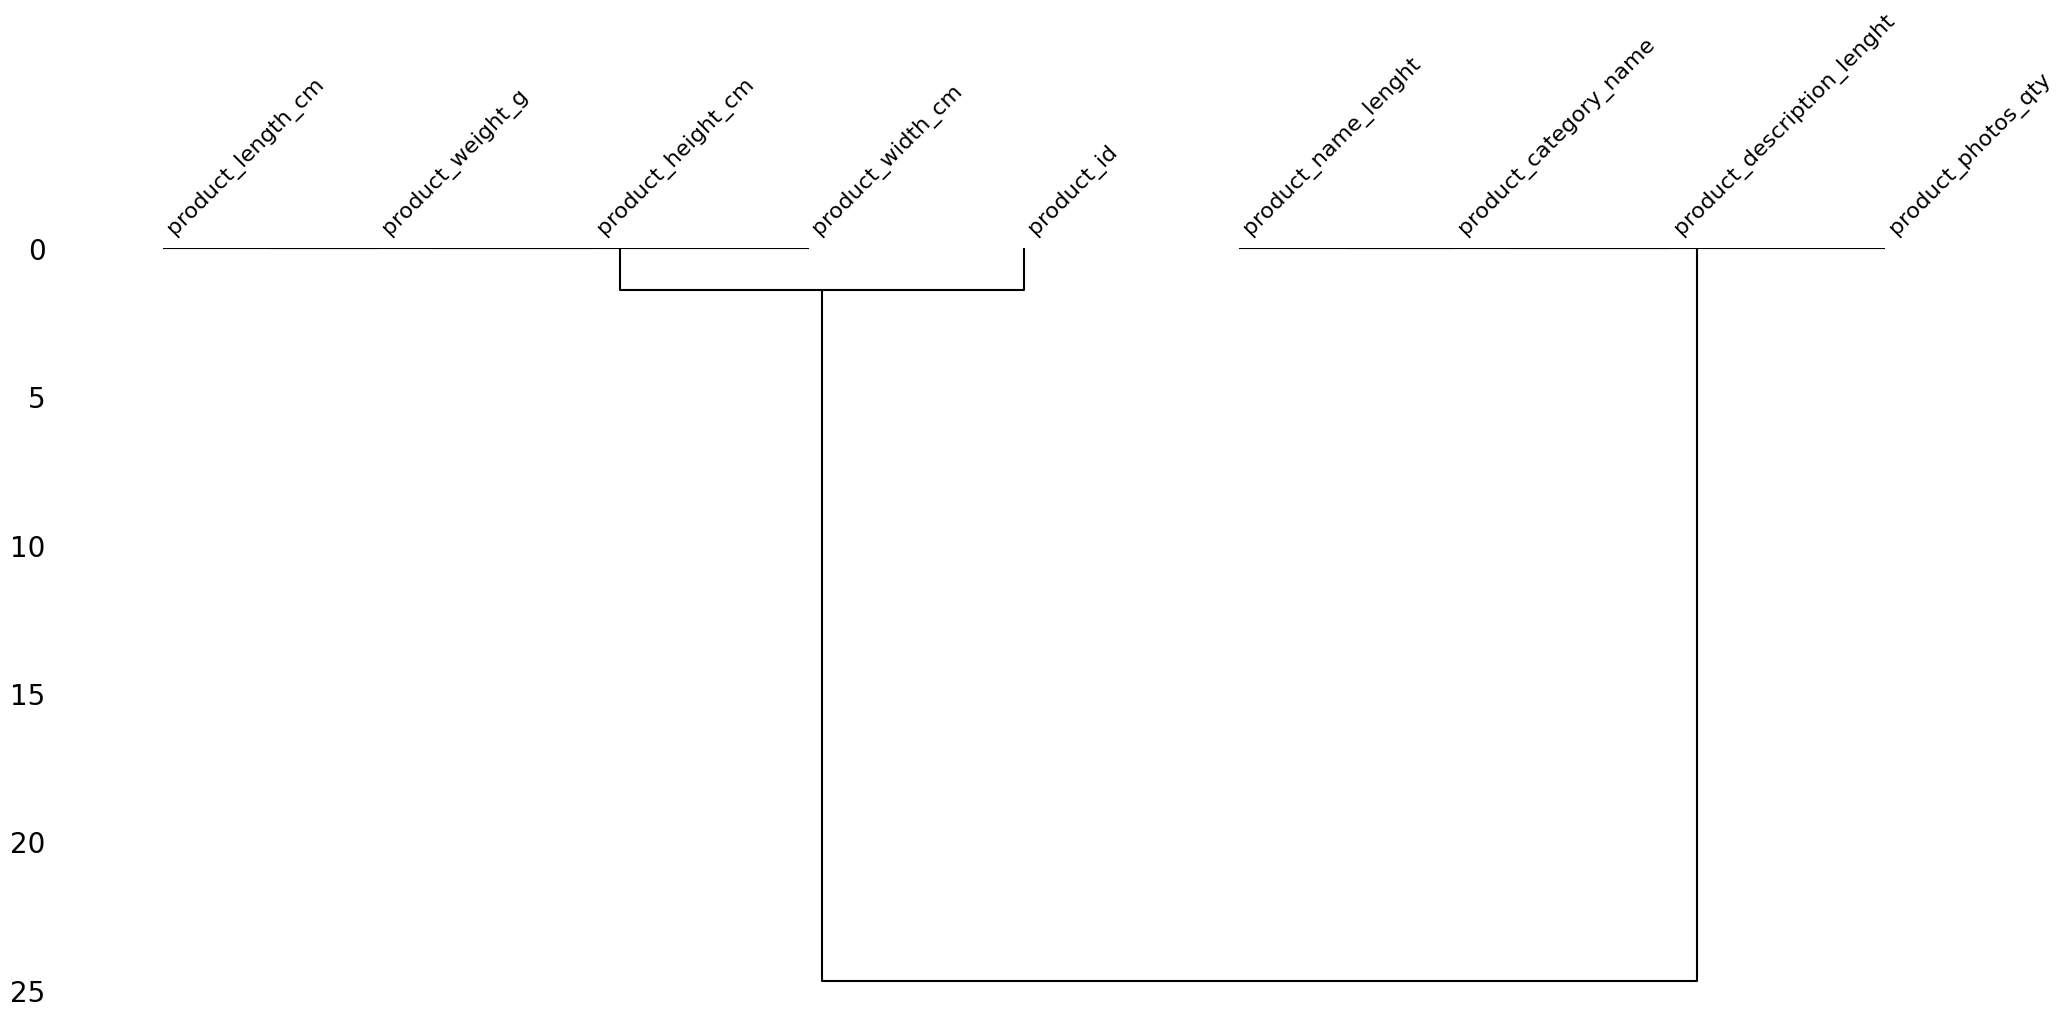

In [47]:
# prompt: Can I do the same check for the missing values pattern and visualize it, this time in the products dataset?

import matplotlib.pyplot as plt
# Visualize missing values in the products dataframe
print("\nMissing value matrix for 'products' dataframe:")
msno.matrix(products)
plt.show()

print("\nMissing value bar plot for 'products' dataframe:")
msno.bar(products)
plt.show()

# Check the correlation of missing values between columns
print("\nMissing value correlation heatmap for 'products' dataframe:")
msno.heatmap(products)
plt.show()

print("\nMissing value dendrogram for 'products' dataframe:")
msno.dendrogram(products)
plt.show()

## prompt:

Does any of the dataframes contain date or time information?

In [48]:
# prompt: Does any of the dataframes contain date or time information?

import pandas as pd
# Function to check if a DataFrame contains columns with date or time information
def contains_datetime(df, df_name):
    datetime_cols = []
    for col in df.columns:
        # Attempt to convert the column to datetime
        try:
            pd.to_datetime(df[col], errors='raise')
            datetime_cols.append(col)
        except (ValueError, TypeError):
            pass # Not a datetime column

    if datetime_cols:
        print(f"DataFrame '{df_name}' contains potential datetime columns: {datetime_cols}")
        return True
    else:
        print(f"DataFrame '{df_name}' does not appear to contain datetime columns.")
        return False

# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and check for pandas DataFrames
found_datetime_df = False
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with 'olist_' (after removing 'df_')
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        if contains_datetime(var_value, var_name):
            found_datetime_df = True

if not found_datetime_df:
    print("\nNo DataFrame found in the current scope appears to contain date or time information.")


/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

DataFrame 'order_payments' contains potential datetime columns: ['payment_sequential', 'payment_installments', 'payment_value']
DataFrame 'order_reviews' contains potential datetime columns: ['review_score', 'review_creation_date', 'review_answer_timestamp']
DataFrame 'customers' contains potential datetime columns: ['customer_zip_code_prefix']


/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

DataFrame 'geolocation' contains potential datetime columns: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
DataFrame 'orders' contains potential datetime columns: ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
DataFrame 'order_items' contains potential datetime columns: ['order_item_id', 'shipping_limit_date', 'price', 'freight_value']
DataFrame 'products' contains potential datetime columns: ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
DataFrame 'sellers' contains potential datetime columns: ['seller_zip_code_prefix']


/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col], errors='raise')
/tmp/ipython-input-48-1426517338.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

## prompt: Can I get all the column names for the datasets?

In [49]:
# prompt: Can I get all the column names for the datasets?

import pandas as pd
# Get all variables in the current scope
all_vars = dict(globals())

# Iterate through the variables and print column names for pandas DataFrames
for var_name, var_value in all_vars.items():
    # Check if the variable is a pandas DataFrame and its name starts with one of the expected names
    if isinstance(var_value, pd.DataFrame) and any(var_name == file_name.replace('olist_', '').replace('_dataset.csv', '') for file_name in data_files if file_name.startswith('olist_')):
        print(f"\nColumns for DataFrame '{var_name}':")
        print(var_value.columns.tolist())


Columns for DataFrame 'order_payments':
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Columns for DataFrame 'order_reviews':
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Columns for DataFrame 'customers':
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Columns for DataFrame 'geolocation':
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Columns for DataFrame 'orders':
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Columns for DataFrame 'order_items':
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Columns for DataFrame 'produc